# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [202]:
from sklearn.linear_model import Perceptron

def runPerceptron(dataFile: str, max_iter: int = None):
    if max_iter:
        clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=max_iter)
    else:
        clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
    Data_Set = arff.loadarff(dataFile)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    clf.fit(X, y)
    print(clf.coef_)
    print(clf.intercept_)
    print(clf.score(X, y))

runPerceptron('debug.arff', 10)

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.00 seconds.
--

c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [203]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.
runPerceptron('evaluation.arff', 10)

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.00

**Report Results:**  
Final Accuracy: 0.9766763848396501  
Final Weights: [[-4.28857497 -2.390381   -3.0160324  -1.1686672 ]]  
Final Bias: [5.2]  

The results tell us important details about our classification model. For example, the Final weights ([[-4.28857497 -2.390381   -3.0160324  -1.1686672 ]]) tell us the about of weight given to each input value (ex: 3.6216,8.6661,-2.8073,-0.44699). This can also be seen as how strongly a given input value impacts the classification of a data point. Futher, notice that the final accuracy was 0.9766763848396501. Why was this not 1.0? Didn't it converge? I think that the reason this dataset converged without reaching 100% accuracy was becuase this dataset is not linearly seperable. The Perceptron model did its best to classify the data, found the weights which minimize error, and converged when the weights stopped changing. Finally, the bias tells us the weight given to the bias input of 1.

**Discussion:**  
In this task I ran the exact same perceptron model that I ran on the debug.arff data on evaluation.arff. From this line of code: Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10), you can see that this means I did not suffle the data after each iteration, I requested verbose output (showing information about each Epoch), I set the learning rate to .1, and the maximum number of epochs this model would train on was 10.

While I set the maximum number of epochs to 10, from the output you can see that this model was only trained on 9 epochs. The reason for this discrepancy is because this model converged on the 9th epoch. Convergence means that the model found weights for all inputs, including bias, which correctly classifies all data points. Because the data was all correctly classified after 9 epochs, there was no need to continue onto a 10th epoch, so the model stopped.

Further, note that I set the learning rate to .1. This is a constant value which determines how fast the weights should adjust while looking for convergence. The learning rate should not be too big, otherwise the model will jump over the wights that will cause convergence. Likewise, the learning rate should not be too small otherwise the model will take much longer to converge (it will however get there, given enough epochs).





## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [204]:
# Create and show the 2 datasets. 
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('linearlySeperable.arff')

dataFrame = pd.DataFrame(data)

print('Linearly Seperable Data:')
print(dataFrame)


data, meta = arff.loadarff('notLinearlySeperable.arff')

dataFrame = pd.DataFrame(data)

print('\nNot Linearly Seperable Data:')
print(dataFrame)

Linearly Seperable Data:
     a1    a2 class
0   3.0   4.0  b'1'
1   7.0  10.0  b'1'
2   0.0   5.0  b'1'
3  -5.0   0.0  b'1'
4  10.0   0.0  b'0'
5  10.0  10.0  b'0'
6  11.0  13.0  b'0'
7   8.0   5.0  b'0'

Not Linearly Seperable Data:
    a1   a2 class
0 -1.0  0.0  b'1'
1  1.0  0.0  b'1'
2  0.0  1.0  b'1'
3  0.0 -1.0  b'1'
4 -2.0  0.0  b'0'
5  2.0  0.0  b'0'
6  0.0  2.0  b'0'
7  0.0 -2.0  b'0'


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [205]:
# Train and print results with both datasets 
print('Linearly Seperable Data:')
runPerceptron('linearlySeperable.arff')

print('\nNot Linearly Seperable:')
runPerceptron('notLinearlySeperable.arff')

Linearly Seperable Data:
-- Epoch 1
Norm: 1.34, NNZs: 2, Bias: 0.100000, T: 8, Avg. loss: 0.450000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 2, Bias: 0.200000, T: 16, Avg. loss: 2.537500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.22, NNZs: 2, Bias: 0.300000, T: 24, Avg. loss: 2.325000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 32, Avg. loss: 0.312500
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 64, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.08, NNZs: 2, Bias: 0.400000, T: 72, Avg. loss: 0.000000
Total training time: 

*Discussion*

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

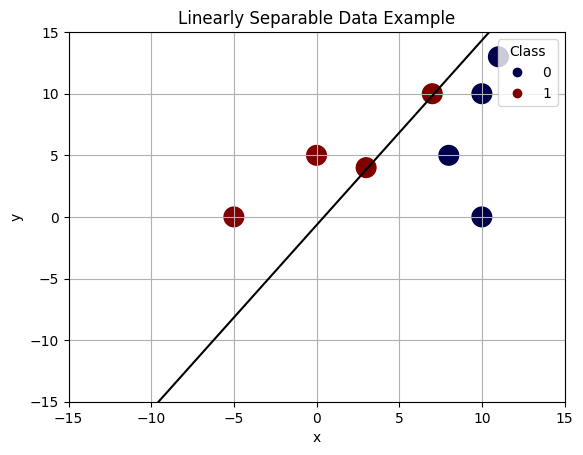

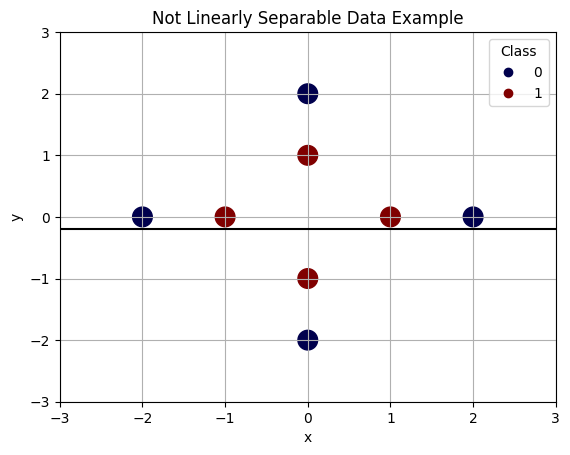

In [206]:
# Graph datasets and decision lines for both cases.

import matplotlib.pyplot as plt
import numpy as np

# The data in this example is made up.  You will use your real data.
data = np.array([[8.0,5.0],[11.0,13.0],[10.0,10.0],[10.0,0.0],[3.0,4.0],[7.0,10.0],[0.0,5.0],[-5.0,0.0]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-15,15)
plt.ylim(-15,15)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = 3/2  # made up
intercept = -(2/3) # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot



# The data in this example is made up.  You will use your real data.
data = np.array([[0,-2],[0,2],[2,0],[-2,0],[0,-1],[0,1],[1,0],[-1,0]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-3,3)
plt.ylim(-3,3)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-3.0, 3.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-3.0, 3.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = 0
intercept = -0.2
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Not Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

*Discussion*

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [207]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# load the arff data
votingData = arff.loadarff('voting.arff')

# convert to a dataframe and encode the labels as 1/0
votingDataFrame = pd.DataFrame(votingData[0])
votingLabelsEncoded = votingDataFrame.apply(LabelEncoder().fit_transform)

# split the data 30/70
splitData = train_test_split(votingLabelsEncoded, test_size=0.3, train_size=0.7, shuffle=True)

trainingData = splitData[0]
testData = splitData[1]

# init Perceptron with a learning rate of 1
percept = Perceptron(eta0=1, verbose=1)

# init training dataset
trainingDataSet_DF = pd.DataFrame(trainingData)
trainingDataSet_NP = trainingDataSet_DF.to_numpy()
trainingDataSet_NP = trainingDataSet_NP.astype(float)
trainX = trainingDataSet_NP[:, :-1]
trainy = trainingDataSet_NP[:, -1]

# train on training dataset and print results
percept.fit(trainX, trainy)
print(percept.coef_)
print(percept.intercept_)
print('training score: ', percept.score(trainX, trainy))

# init test dataset
testDataSet_DF = pd.DataFrame(testData)
testDataSet_NP = testDataSet_DF.to_numpy()
testDataSet_NP = testDataSet_NP.astype(float)
testX = testDataSet_NP[:, :-1]
testy = testDataSet_NP[:, -1]

# test model on test dataset
print('test score: ', percept.score(testX, testy))


-- Epoch 1
Norm: 13.34, NNZs: 16, Bias: -2.000000, T: 322, Avg. loss: 0.341615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 15.00, NNZs: 14, Bias: -4.000000, T: 644, Avg. loss: 0.329193
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 17.00, NNZs: 14, Bias: -3.000000, T: 966, Avg. loss: 0.276398
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 18.22, NNZs: 15, Bias: -4.000000, T: 1288, Avg. loss: 0.226708
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.08, NNZs: 16, Bias: -5.000000, T: 1610, Avg. loss: 0.267081
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 18.47, NNZs: 14, Bias: -6.000000, T: 1932, Avg. loss: 0.270186
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 20.52, NNZs: 15, Bias: -6.000000, T: 2254, Avg. loss: 0.236025
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 21.28, NNZs: 15, Bias: -7.000000, T: 2576, Avg. loss: 0.189441
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 23.04, NNZs: 15, Bias: -6.000000, T: 2898, Avg. loss: 0.236025
Tot

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | 0.9720496894409938 | 0.9424460431654677 | 14 |
| 2 | 0.9596273291925466 | 0.9424460431654677 | 7 |
| 3 | 0.9751552795031055 | 0.935251798561151 | 10 |
| 4 | 0.9658385093167702 | 0.9640287769784173 | 15 |
| 5 | 0.9192546583850931 | 0.9064748201438849 | 14 |
| Average | 0.9583850931677 | 0.93812949640288 | 12 | 

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [208]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron

# load the arff data
votingData = arff.loadarff('voting.arff')

# convert to a dataframe and encode the labels as 1/0
votingDataFrame = pd.DataFrame(votingData[0])
votingLabelsEncoded = votingDataFrame.apply(LabelEncoder().fit_transform)

# init Perceptron with a learning rate of 1
percept = Perceptron(eta0=1, verbose=1)

# init training dataset
DataSet_DF = pd.DataFrame(votingLabelsEncoded)
DataSet_NP = DataSet_DF.to_numpy()
DataSet_NP = DataSet_NP.astype(float)
X = DataSet_NP[:, :-1]
y = DataSet_NP[:, -1]

# train on training dataset and print results
percept.fit(X, y)
print(percept.coef_)
print(percept.intercept_)
print('training score: ', percept.score(X, y))

-- Epoch 1
Norm: 14.28, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.305857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.26, NNZs: 11, Bias: -3.000000, T: 922, Avg. loss: 0.308026
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.97, NNZs: 15, Bias: -5.000000, T: 1383, Avg. loss: 0.255965
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.90, NNZs: 15, Bias: -5.000000, T: 1844, Avg. loss: 0.203905
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 22.43, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.253796
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 23.17, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.208243
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 23.85, NNZs: 15, Bias: -8.000000, T: 3227, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 25.22, NNZs: 15, Bias: -10.000000, T: 3688, Avg. loss: 0.234273
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 25.69, NNZs: 14, Bias: -9.000000, T: 4149, Avg. loss: 0.277657
T

### 3.3 (15%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 50% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

-- Epoch 1
Norm: 14.59, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.373102
Total training time: 0.00 seconds.
[[ 0. -2. -5. 10.  0.  0.  1.  3. -3.  2. -5.  3.  1.  0. -5.  1.]]
[-2.]
Misclassification Rate:  0.045553145336225564
-- Epoch 1
Norm: 18.89, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.219089
Total training time: 0.00 seconds.
[[ 0. -1. -5. 13.  1.  0.  1.  2. -5.  3. -8.  1.  2.  0. -7.  2.]]
[-4.]
Misclassification Rate:  0.049891540130151846
-- Epoch 1
Norm: 19.52, NNZs: 14, Bias: -5.000000, T: 461, Avg. loss: 0.284165
Total training time: 0.00 seconds.
[[ 0. -1. -7. 14.  0. -1.  2.  4. -4.  2. -7.  1.  3. -1. -5.  3.]]
[-5.]
Misclassification Rate:  0.03470715835141003
-- Epoch 1
Norm: 20.49, NNZs: 16, Bias: -6.000000, T: 461, Avg. loss: 0.253796
Total training time: 0.00 seconds.
[[ 1. -1. -5. 14.  1. -2.  2.  4. -7.  3. -8.  2.  2. -1. -5.  4.]]
[-6.]
Misclassification Rate:  0.03687635574837311
-- Epoch 1
Norm: 22.78, NNZs: 15, Bias: -7.000000, T: 461, Avg. lo

c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

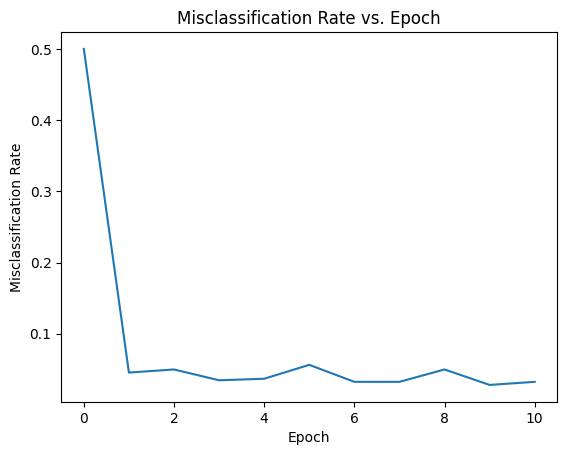

In [209]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# load the arff data
votingData = arff.loadarff('voting.arff')

# convert to a dataframe and encode the labels as 1/0
votingDataFrame = pd.DataFrame(votingData[0])
votingLabelsEncoded = votingDataFrame.apply(LabelEncoder().fit_transform)

# init Perceptron with a learning rate of 1
percept = Perceptron(eta0=1, verbose=1, max_iter=1, warm_start=True, random_state=20) # with random_state=20, it converges after 10 epochs

# init training dataset
DataSet_DF = pd.DataFrame(votingLabelsEncoded)
DataSet_NP = DataSet_DF.to_numpy()
DataSet_NP = DataSet_NP.astype(float)
X = DataSet_NP[:, :-1]
y = DataSet_NP[:, -1]


misclassificationRateArray = [.5]
# train on training dataset and print results
for epoch in range(10):
    percept.fit(X, y)
    print(percept.coef_)
    print(percept.intercept_)
    misclassificationRate = 1-percept.score(X, y)
    misclassificationRateArray.append(misclassificationRate)
    print('Misclassification Rate: ', misclassificationRate)


def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

plot_misclassification(misclassificationRateArray)

*Show table and discuss*

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [171]:
# Run the model with different 
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron

# load the arff data
votingData = arff.loadarff('voting.arff')

# convert to a dataframe and encode the labels as 1/0
votingDataFrame = pd.DataFrame(votingData[0])
votingLabelsEncoded = votingDataFrame.apply(LabelEncoder().fit_transform)

# init Perceptron with a learning rate of 1
percept = Perceptron(eta0=1, warm_start=True)

# init training dataset
DataSet_DF = pd.DataFrame(votingLabelsEncoded)
DataSet_NP = DataSet_DF.to_numpy()
DataSet_NP = DataSet_NP.astype(float)
X = DataSet_NP[:, :-1]
y = DataSet_NP[:, -1]


# train on training dataset and print results
percept.fit(X, y)
print(percept.coef_)
print(percept.intercept_)
print(percept.n_iter_)
print('Score: ', percept.score(X, y))


percept.fit(X, y)
print(percept.coef_)
print(percept.intercept_)
print(percept.n_iter_)
print('Score: ', percept.score(X, y))

[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
[-9.]
9
Score:  0.9609544468546638
[[ -1.   0.  -8.  18.   4.  -1.   4.   8.  -8.   6. -10.   1.   1.   1.
   -7.   2.]]
[-10.]
7
Score:  0.9587852494577006


**Shuffle:**  
When Shuffle is set to True (as it is by default), then the data will be shuffled after each epoch.  
As I experimented with the shuffle hyperparameter on the scikit Perceptron class, I found that when shuffling it may take more epochs for the model to converge. For exmaple, using the voting data set and keeping all other hyperparameters the same (eta0=.1), running perceptron with shuffle=True, the model went through 9 epochs and converged with an accuracy score of 0.96529284164859. Meanwhile, keeping all other hyperparameters the same but setting shuffle=False, the model went through 8 epochs (one less than when shuffle=True) and converged with the same accuracy score, 0.96529284164859.  
I think I observed this difference because when the data is not shuffled, it may encounter many of the same misclassifications early on and correct them more quickly. However, this could be a problem because it has just learned to fit those classifications and may not generalize as well. When shuffled, the model encounters misclassifications in a different order causing it to find a different path to convergence that may take longer, but will generalize to unseen data better.

**eta0 - learning rate:**  
eta0 is the constant that all updates are multiplied by. If this constant is big, then with each update the the weights will change dramatically.  
As I played with the eta0, the first thing I noticed is that all weights are multiples of the eta0 value. This makes sense becaues eta0 is the constant each change in weight in multiplied by when updating weights.  
As I continued experimenting, I found that increasing/decreasing the eta0 doesn't necessarily improve Test Accuracy or the number of epochs. As you can see in the table below, each eta0 produced slightly different results.

| eta0 | Number of Epochs | Test Accuracy |
| --- | --- | --- |
| 0.00001 | 6 | 0.9587852494577006 |
| 0.0001 | 6 | 0.9587852494577006 |
| 0.001 | 6 | 0.9631236442516269 |
| 0.01 | 6 | 0.9436008676789588 |
| 0.1 | 9 | 0.96529284164859 |
| 1 | 9 | 0.9609544468546638 |

I figure that there is some variance in the Test Accuracy between learning rates because each learning rate will lead the model along a slightly different path to its convergence and some learning rates might be able to lead the bias/weights to seperate data between two points that bigger learning rates will not be able to land in because they are too big and their ajustments will jump over it.


**Verbose:**  
The hyperparameter verbose determines how much information the model will output concerning its path to convergence. For example, when verbose is set to false, and nothing is printed (such as .coef_, .intercept_, .n_iter_), no information is output about the model. However, when verbose is set to True, the following information is output about each epoch:

-- Epoch (#)
Norm: 14.28, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.305857
Total training time: 0.00 seconds.
...  
  
and at the end will finally output:  
Convergence after __ epochs took ____ seconds


**fit_intercept:**  
The hyperparameter fit_intercept determines if a bias weight should be used to adjust the y-intercept. If fit_intercept is set to False, then the y-intercept will be assumed to be 0 and the resulting line is guarenteed to pass through the origin. This should be used when the data is alreay centered and the y-intercept does not need to be determined. The default value for fit-intercept is True, that means a bias will be used to determine the best y-intercept value for the model and weights.  

fit_intercept does have an effect on the results of the perceptron model. For example, when fit_intercept is set to True, my model converged after 9 epochs with an accuracy of 0.9609544468546638. Meanwhile, when I set fit_intercept to False, keeping all other hyperparameters the same, the model converged after 11 epochs with an accuracy of 0.93058568329718.  

I assume that the accuracy decreased and the number of epochs increased because the most optimal linearly seperating line through the origin is less optimal than the best line not required to pass through the origin.


**random_state:**  
When shuffle is set to True, random_state is used to reproduce the same shuffling every time accross function calls. For example, when random_state = 20, this model always converges after 10 epochs and has an accuracy of 0.9566160520607375, no matter how many times it is called this will remain constant. However, keeping all other hyperparameters the same, when random_state is set to 21 this model converges after 12 epochs and has an accuracy of 0.96529284164859, and again, this remains constant no matter now many times it is run.


**warm_start:**  
When warm_start is set to True, it uses the weights of the previous call to perceptron.fit() as a starting point rather than initializing to brand new, small weights. In my experimentation, I found that sometimes having a warm start helps improve accuracy, but there are often many times, especially when eta0 is large, that having a warm start will cause the weights to jump away from the optimal solution. 

For example, in my experimentation, I found that running perceptron once with eta0 set to .01, and then again with a warm_start on the same data, improved accuracy from 0.9436008676789588 to 0.9609544468546638 with 6 epochs for each .fit(). However, with larger learning rates, the opposite result was observed.

With a learning rate of 1, the first learning produced an accuracy score of 0.9609544468546638 after 9 epochs. Then, a second learning with a warm start produced an accuracy of 0.9587852494577006 after 7 more epochs. Interestingly, having a warm start is not necessarily always good for improving accuracy, depending on the learning rate.


## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [201]:
# Load and Train on your dataset and report results

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets.copy()

# make features suitable for perceptron input
X = pd.get_dummies(X, columns=['workclass'])
X['age'] = (X['age'] - X['age'].min()) / (X['age'].max() - X['age'].min())
X['fnlwgt'] = (X['fnlwgt'] - X['fnlwgt'].min()) / (X['fnlwgt'].max() - X['fnlwgt'].min())
X = pd.get_dummies(X, columns=['education'])
X['education-num'] = (X['education-num'] - X['education-num'].min()) / (X['education-num'].max() - X['education-num'].min())
X = pd.get_dummies(X, columns=['marital-status'])
X = pd.get_dummies(X, columns=['occupation'])
X = pd.get_dummies(X, columns=['relationship'])
X = pd.get_dummies(X, columns=['race'])
X = pd.get_dummies(X, columns=['sex'])
X = pd.get_dummies(X, columns=['native-country'])
X['capital-gain'] = (X['capital-gain'] - X['capital-gain'].min()) / (X['capital-gain'].max() - X['capital-gain'].min())
X['capital-loss'] = (X['capital-loss'] - X['capital-loss'].min()) / (X['capital-loss'].max() - X['capital-loss'].min())
X['hours-per-week'] = (X['hours-per-week'] - X['hours-per-week'].min()) / (X['hours-per-week'].max() - X['hours-per-week'].min())

# make all target values 1 or 0
y.loc[y['income'] == '>50K.', 'income'] = '>50K'
y.loc[y['income'] == '<=50K.', 'income'] = '<=50K'
y['income'] = y['income'].replace({'>50K': 1, '<=50K': 0})


# init perceptron
percept = Perceptron(eta0=1, shuffle=True)

X = X.to_numpy().astype(float) # training data
y = y['income'].to_numpy() # target data

# train on training dataset and print results
percept.fit(X, y)

# output results
print('coef: ', percept.coef_)
print('intercept: ', percept.intercept_)
print('iterations', percept.n_iter_)
print('Score: ', percept.score(X, y))

C:\Users\child\AppData\Local\Temp\ipykernel_1756\273203284.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['income'] = y['income'].replace({'>50K': 1, '<=50K': 0})


coef:  [[  6.4109589    3.70501145   4.66666667 102.47610476   6.2855831
    9.43877551   1.           4.           0.          -1.
    2.           2.           0.           3.           0.
   -1.          -2.          -2.           1.          -1.
   -2.           0.          -2.           0.           3.
    1.          -1.           2.         -10.           5.
   -1.          -4.           5.           3.          -3.
   -3.          -3.          -5.           0.           1.
    4.           0.           3.          -7.           0.
   -1.          -4.          -4.           2.           6.
    7.           2.           2.           0.          -2.
   -3.          -6.          -4.           5.          -4.
   -2.          -3.           0.          -1.          -4.
   -6.          -3.           0.           2.          -4.
   -7.          -2.          -4.          -1.          -3.
    1.           0.           1.          -4.          -2.
    2.           0.          -2.          

*Discuss how the perceptron did on the data set and why you think it performed as such.*

I used the dataset from UC Irvine on adult incomes. This dataset provides 13 input features including: age, working class, education, marital status, occupation, relationship, race, etc...  

Additionally, this dataset includes 1 target feature: income classified by <=50K or >50K.  

Many of these input features were not values that perceptron can learn from. For example, occupation, work-class, and native-country are values that are not directly quantifiable. Further, these vales if they were converted directly from country (for example) to an integer, it would miscommunicate to the percetron model the meaning of those numbers. That is, if United States mapped to 1 and Cambodia mapped to 2, the perceptron would interprit that to mean that the United States and Cambodia are similar countries. In cases such as this, I used pd.get_dummies(X, columns=['workclass']) to create a new input for each potential workclass value. 

Another issue I faced was that some values had huge ranges of values (0 - 1000000), while others had smaller ranges. If left like this, the weights would be skewed in the direction of the weights with huge ranges because each weight update would be magnified by the large numbers. To solve this problem, all integer inputs were normalized on a range of 0 - 1.  

Finally, when I ran the perceptron model on this data with a learning rate of 1, I was able to predict the income class of a person with 83.219% accuracy. I think this is pretty good! Analyzing the final weights of the model, it looks like a person's education had an HUGE impact on their income. I say this because while most of the weights are between -10 and +10, education was given a weight of 102.48. This means that the perceptron found that it was most correct when it put a heavy weight on a person's education level.  

Normalization is another way I may have gotten the results I did. To see what would have happened had I not normalized results, I removed all column normalizations and re-ran my perceptron model. As one might have guessed, my accuracy dropped by 6%. I think that by normalzaion I improved my results.

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [12]:
# Your Perceptron Code

*Discussion*

In [ ]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass